## IMDB数据探索

 数据下载

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)

C:\Users\lejon\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.11.0


In [2]:
imdb = keras.datasets.imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000) # 取出常用的前10000字词

查看数据样本量

In [3]:
print('Trainng entries:{},labels:{}'.format(len(train_data),len(train_labels)))

Trainng entries:25000,labels:25000


In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
print(len(train_data[0]),len(train_data[1])) 
# 影评的长度不同，因此我们在放入model之前，要将长度统一

218 189


将数字转换为字词，便于查看

In [6]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['UNK'] = 2 # unknow 
word_index['<UNUSED>'] = 3
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

In [7]:
# 查看影评
decode_review(train_data[1])

"<START> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal UNK the hair is big lots of boobs UNK men wear those cut UNK shirts that show off their UNK sickening that men actually wore them and the music is just UNK trash that plays over and over again in almost every scene there is trashy music boobs and UNK taking away bodies and the gym still doesn't close for UNK all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

数据准备

In [8]:
# 影评长度相同，使用pad_sequences函数将长度标准化
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index['<PAD>'],
                                                       padding = 'post',
                                                       maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                      value=word_index['<PAD>'],
                                                       padding='post',
                                                      maxlen = 256)

In [9]:
# 查看处理情况
print(len(train_data[0]),len(train_data[1]))

256 256


In [10]:
# 查看填充情况,后位不足补0
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

#构建模型

神经网络通过堆叠层创建而成，这需要做出两个架构方面的主要决策：

1）模型的层数设置
2）每一层的隐藏单元设置

目标导向：输入是字词对应的整数，预测的标签为0，1。这是一个文本的二分类问题，若是情感类的问题，labels可以是0，1，2或者0，1，2，3，4。文本分类一般是将文字切分、字词对应为整数、将输入的维度截长补短，统一维度、放入model、预测出概率、根据概率大小返回labels。

In [11]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16)) # 嵌入层设置
model.add(keras.layers.GlobalAveragePooling1D()) 
model.add(keras.layers.Dense(16,activation=tf.nn.relu)) 
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


# 按顺序堆叠各个层以构建分类器：
1）embedding层：该层会在整数编码的词汇表中查找每个字词-索引的嵌入向量。模型在接受训练时会学习这些向量。这些向量会向输出数组添加一个维度。生成的维度为：(batch,sequence,embedding)

2）GlobalAveragePooling1D层：对序列维度求平均值，针对每个样本返回一个长度固定的输出向量。这样，模型便能够以尽可能简单的方式处理各种长度的输入。

3）Dense层：该长度固定的输出向量会传入一个全连接(Dense)层，包含16各隐藏单元。

4）最后一层与单个输出结点密集连接。选用sigmoid激活函数后，结果是介于0-1的float数值，表示概率或置信水平。

# 损失函数和优化器
输出为一个概率，因此使用binary_crossentropy损失函数。binary_crossentropy一般用于处理概率问题，mean_squared_error用于处理回归问题。

In [12]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
# 创建验证集
x_val = train_data[:10000] # 表示在train_data中取出前10000个样本
partial_x_train = train_data[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## 训练模型
用有512个样本的小批次训练模型20个周期。这将对x_train和y_train张量中的所有样本进行40次迭代。在训练期间，监控模型在验证集的1000个样本上的损失和准确率

In [14]:
history = model.fit(partial_x_train,partial_y_train,
                   epochs = 20,
                   batch_size=512,
                   validation_data=(x_val,y_val),
                   verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 339us/step - loss: 0.6909 - acc: 0.6212 - val_loss: 0.6877 - val_acc: 0.7165
Epoch 2/20
15000/15000 [==============================] - 3s 231us/step - loss: 0.6822 - acc: 0.7324 - val_loss: 0.6763 - val_acc: 0.6993
Epoch 3/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.6652 - acc: 0.7552 - val_loss: 0.6555 - val_acc: 0.7488
Epoch 4/20
15000/15000 [==============================] - 3s 209us/step - loss: 0.6373 - acc: 0.7665 - val_loss: 0.6257 - val_acc: 0.7814
Epoch 5/20
15000/15000 [==============================] - 3s 221us/step - loss: 0.5991 - acc: 0.8031 - val_loss: 0.5863 - val_acc: 0.7935
Epoch 6/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.5535 - acc: 0.8219 - val_loss: 0.5432 - val_acc: 0.8083
Epoch 7/20
15000/15000 [==============================] - 3s 221us/step - loss: 0.5044 - acc: 0.8403 - val_loss: 0.4990 - 

# 评估模型
模型会返回两个值：损失(表示误差的数字，越低越好)和准确率

In [15]:
results = model.evaluate(test_data,test_labels)
print(results)

25000/25000 [==============================] - 2s 85us/step
[0.3065829295539856, 0.87496]


# 创建准确率和损失随时间变化的图
model.fit()返回一个History对象，该对象包含一个字典。其中包括训练期间发生的所有情况

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

一共有 4 个条目：每个条目对应训练和验证期间的一个受监控指标。我们可以使用这些指标绘制训练损失与验证损失图表以进行对比，并绘制训练准确率与验证准确率图表：

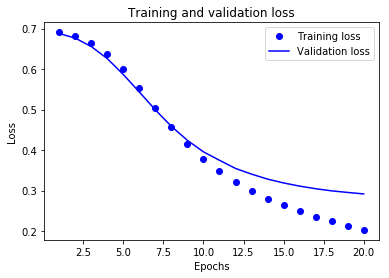

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

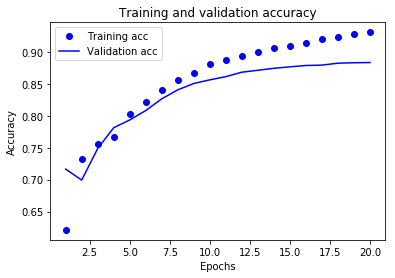

In [19]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
